In [1]:

import matplotlib
import matplotlib.pyplot as plt 
import ciw
import random
import networkx as nx
from statistics import mean
import numpy as np

## Пользователи:
- Отдел бухгалтерии
- Отдел финансовый
- Отдел маркетинга
- Отдел ИТ
- Главный отдел: Началник + Замы

## Сервисы:
- VPN-сервер
- Веб-сервер
- Почтовый сервер
- Сервер 1С
- Файл-сервер
- CRM-сервер

## 2 класса (2 типа) трафика: Класс 0 имеет выший приоритет
- Class 0: мультимедийный трафик (голос, видео)
- Class 1: обычный трафик (текст, ...)

## Результаты моделирования
- Загруженность серверов
- Количество заявок в среднем
- Количество отказов

# Единица времени

In [2]:
t = 100*60 # minutes
hour = (t/60) % 24
day = (t/60/24) % (7)
month = (t/60) / 24
hour, day, month

(4.0, 4.166666666666667, 4.166666666666667)

In [3]:
time = 24*10 # hour
hour = time % 24
day = (time/24) % 7
month = time / (24*30)
hour, day, month

(0, 3.0, 0.3333333333333333)

# Режим работы:
- Рабочий: 9 < hour < 18, 0 < day < 5, 1 < month < 12

# 1. Топология сети - нумерация узлов начинается с 0 по 22

In [4]:
G = nx.Graph()
import numpy as np
node_list = np.arange(0, 23) # numerate node from 0 to 22.
G.add_nodes_from(node_list)
G.add_edges_from([(0, 4), (1, 4), (2, 4), (3, 4), (4, 5), (4, 6), (4, 7), (4,8)])
G.add_edges_from([(8, 9), (9, 10), (9, 11), (9, 12), (9, 13), (10, 14), (14, 15), (15, 16)])
G.add_edges_from([(14, 17), (17, 18), (14, 21), (21, 22), (14, 19), (19, 20)])

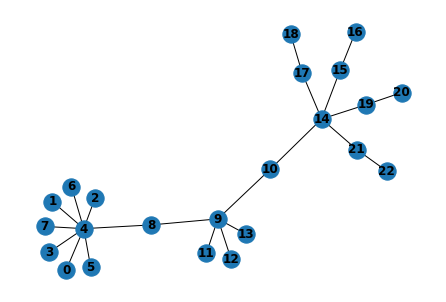

In [5]:
nx.draw(G, with_labels=True, font_weight='bold')

# Построение таблиц маршрутизации

In [6]:
# Таблица маршрутизации трафика класса 0
class0_routing = np.zeros((23, 23))
class0_routing[0][4] = 1.0
class0_routing[1][4] = 1.0
class0_routing[2][4] = 1.0
class0_routing[3][4] = 1.0

class0_routing[4][5] = 0.25
class0_routing[4][6] = 0.25
class0_routing[4][7] = 0.25
class0_routing[4][8] = 0.25

class0_routing[8][9] = 1.0

class0_routing[9][11] = 0.3
class0_routing[9][12] = 0.6
class0_routing[9][13] = 0.1

class0_routing[10][9] = 1.0
class0_routing[14][10] = 1.0

class0_routing[16][15] = 1.0
class0_routing[15][14] = 1.0

class0_routing[18][17] = 1.0
class0_routing[17][14] = 1.0

class0_routing[20][19] = 1.0
class0_routing[19][14] = 1.0

class0_routing[22][21] = 1.0
class0_routing[21][14] = 1.0

In [7]:
# Таблица маршрутизации трафика класса 1
class1_routing = np.zeros((23, 23))
class1_routing[0][4] = 1.0
class1_routing[1][4] = 1.0
class1_routing[2][4] = 1.0
class1_routing[3][4] = 1.0

class1_routing[4][5] = 0.1
class1_routing[4][6] = 0.2
class1_routing[4][7] = 0.3
class1_routing[4][8] = 0.4

class1_routing[8][9] = 1.0

class1_routing[9][11] = 0.3
class1_routing[9][12] = 0.6
class1_routing[9][13] = 0.1

class1_routing[10][9] = 1.0
class1_routing[14][10] = 1.0

class1_routing[16][15] = 1.0
class1_routing[15][14] = 1.0

class1_routing[18][17] = 1.0
class1_routing[17][14] = 1.0

class1_routing[20][19] = 1.0
class1_routing[19][14] = 1.0

class1_routing[22][21] = 1.0
class1_routing[21][14] = 1.0

# 2. Моделирования в течение часа
- Единица врмение - минута
- Задавать интенсивность заявков в узлах: Node0, Node1, Node2, Node3, Node14, Node16, Node18, Node20, Node22

## 2.1 Создание сети

In [8]:
lam1 = 500/18
lam2 = 10/18
mu1 = 800/18
mu2 = 1000/18

N = ciw.create_network(
    arrival_distributions={'Class 0': [ciw.dists.Exponential(rate=lam1),       # Node 0
                                       ciw.dists.Exponential(rate=lam1),       # Node 1
                                       ciw.dists.Exponential(rate=lam1),       # Node 2
                                       ciw.dists.Exponential(rate=lam1),       # Node 3
                                       ciw.dists.NoArrivals(),              # Node 4
                                       ciw.dists.NoArrivals(),              # Node 5
                                       ciw.dists.NoArrivals(),              # Node 6
                                       ciw.dists.NoArrivals(),              # Node 7
                                       ciw.dists.NoArrivals(),              # Node 8
                                       ciw.dists.NoArrivals(),              # Node 9
                                       ciw.dists.NoArrivals(),              # Node 10
                                       ciw.dists.NoArrivals(),              # Node 11
                                       ciw.dists.NoArrivals(),              # Node 12
                                       ciw.dists.NoArrivals(),              # Node 13
                                       ciw.dists.NoArrivals(),              # Node 14
                                       ciw.dists.NoArrivals(),              # Node 15
                                       ciw.dists.Exponential(rate=lam1),       # Node 16
                                       ciw.dists.NoArrivals(),              # Node 17
                                       ciw.dists.Exponential(rate=lam1),       # Node 18
                                       ciw.dists.NoArrivals(),              # Node 19
                                       ciw.dists.Exponential(rate=lam1),       # Node 20
                                       ciw.dists.NoArrivals(),              # Node 21
                                       ciw.dists.Exponential(rate=lam1)],      # Node 22
                           'Class 1': [ciw.dists.Exponential(rate=lam1),       # Node 0
                                       ciw.dists.Exponential(rate=lam1),       # Node 1
                                       ciw.dists.Exponential(rate=lam1),       # Node 2
                                       ciw.dists.Exponential(rate=lam1),       # Node 3
                                       ciw.dists.NoArrivals(),              # Node 4
                                       ciw.dists.NoArrivals(),              # Node 5
                                       ciw.dists.NoArrivals(),              # Node 6
                                       ciw.dists.NoArrivals(),              # Node 7
                                       ciw.dists.NoArrivals(),              # Node 8
                                       ciw.dists.NoArrivals(),              # Node 9
                                       ciw.dists.NoArrivals(),              # Node 10
                                       ciw.dists.NoArrivals(),              # Node 11
                                       ciw.dists.NoArrivals(),              # Node 12
                                       ciw.dists.NoArrivals(),              # Node 13
                                       ciw.dists.NoArrivals(),              # Node 14
                                       ciw.dists.NoArrivals(),              # Node 15
                                       ciw.dists.Exponential(rate=lam1),       # Node 16
                                       ciw.dists.NoArrivals(),              # Node 17
                                       ciw.dists.Exponential(rate=lam1),       # Node 18
                                       ciw.dists.NoArrivals(),              # Node 19
                                       ciw.dists.Exponential(rate=lam1),       # Node 20
                                       ciw.dists.NoArrivals(),              # Node 21
                                       ciw.dists.Exponential(rate=lam1)]},     # Node 22
    service_distributions={'Class 0': [ciw.dists.Exponential(rate=mu1),       # Node 0
                                       ciw.dists.Exponential(rate=mu1),       # Node 1
                                       ciw.dists.Exponential(rate=mu1),       # Node 2
                                       ciw.dists.Exponential(rate=mu1),       # Node 3
                                       ciw.dists.Exponential(rate=mu1),     # Node 4
                                       ciw.dists.Exponential(rate=mu1),     # Node 5
                                       ciw.dists.Exponential(rate=mu1),     # Node 6
                                       ciw.dists.Exponential(rate=mu1),     # Node 7
                                       ciw.dists.Exponential(rate=mu1),     # Node 8
                                       ciw.dists.Exponential(rate=mu1),     # Node 9
                                       ciw.dists.Exponential(rate=mu1),     # Node 10
                                       ciw.dists.Exponential(rate=mu1),     # Node 11
                                       ciw.dists.Exponential(rate=mu1),     # Node 12
                                       ciw.dists.Exponential(rate=mu1),     # Node 13
                                       ciw.dists.Exponential(rate=mu1),     # Node 14
                                       ciw.dists.Exponential(rate=mu1),     # Node 15
                                       ciw.dists.Exponential(rate=mu1),     # Node 16
                                       ciw.dists.Exponential(rate=mu1),     # Node 17
                                       ciw.dists.Exponential(rate=mu1),       # Node 18
                                       ciw.dists.Exponential(rate=mu1),     # Node 19
                                       ciw.dists.Exponential(rate=mu1),       # Node 20
                                       ciw.dists.Exponential(rate=mu1),    # Node 21
                                       ciw.dists.Exponential(rate=mu1)],      # Node 22
                           'Class 1': [ciw.dists.Exponential(rate=mu1),       # Node 0
                                       ciw.dists.Exponential(rate=mu1),       # Node 1
                                       ciw.dists.Exponential(rate=mu1),       # Node 2
                                       ciw.dists.Exponential(rate=mu1),       # Node 3
                                       ciw.dists.Exponential(rate=mu1),     # Node 4
                                       ciw.dists.Exponential(rate=mu1),     # Node 5
                                       ciw.dists.Exponential(rate=mu1),     # Node 6
                                       ciw.dists.Exponential(rate=mu1),     # Node 7
                                       ciw.dists.Exponential(rate=mu1),     # Node 8
                                       ciw.dists.Exponential(rate=mu1),     # Node 9
                                       ciw.dists.Exponential(rate=mu1),     # Node 10
                                       ciw.dists.Exponential(rate=mu1),     # Node 11
                                       ciw.dists.Exponential(rate=mu1),     # Node 12
                                       ciw.dists.Exponential(rate=mu1),     # Node 13
                                       ciw.dists.Exponential(rate=mu1),     # Node 14
                                       ciw.dists.Exponential(rate=mu1),    # Node 15
                                       ciw.dists.Exponential(rate=mu1),     # Node 16
                                       ciw.dists.Exponential(rate=mu1),     # Node 17
                                       ciw.dists.Exponential(rate=mu1),       # Node 18
                                       ciw.dists.Exponential(rate=mu1),     # Node 19
                                       ciw.dists.Exponential(rate=mu1),       # Node 20
                                       ciw.dists.Exponential(rate=mu1),    # Node 21
                                       ciw.dists.Exponential(rate=mu1)]},     # Node 22
    routing={'Class 0': class0_routing.tolist(),
             'Class 1': class1_routing.tolist()},
    number_of_servers=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    queue_capacities=[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
)

## 2.2 Запуск моделирования

In [9]:
node5_utilisation = []
node6_utilisation = []
node7_utilisation = []
node11_utilisation = []
node12_utilisation = []
node13_utilisation = []

node5_service_time = []
node6_service_time = []
node7_service_time = []
node11_service_time = []
node12_service_time = []
node13_service_time = []

node5_reject = []
node6_reject = []
node7_reject = []
node11_reject = []
node12_reject = []
node13_reject = []

hour_reject = 0

for trial in range(1):
  ciw.seed(trial)
  Q = ciw.Simulation(N)
  Q.simulate_until_max_time(60, progress_bar=False)
  recs = Q.get_all_records()

  # Получить время обслуживания серверов
  node5_service_time.extend([r.service_time for r in recs if r.node==5])
  node6_service_time.extend([r.service_time for r in recs if r.node==6])
  node7_service_time.extend([r.service_time for r in recs if r.node==7])
  node11_service_time.extend([r.service_time for r in recs if r.node==11])
  node12_service_time.extend([r.service_time for r in recs if r.node==12])
  node13_service_time.extend([r.service_time for r in recs if r.node==13])

  # Получить среднюю заргуженность сервера
  node5_utilisation.append(Q.transitive_nodes[5].server_utilisation)
  node6_utilisation.append(Q.transitive_nodes[6].server_utilisation)
  node7_utilisation.append(Q.transitive_nodes[7].server_utilisation)
  node11_utilisation.append(Q.transitive_nodes[11].server_utilisation)
  node12_utilisation.append(Q.transitive_nodes[12].server_utilisation)
  node13_utilisation.append(Q.transitive_nodes[13].server_utilisation)

  # Получичт количество отказов от серверов
  node5_reject.append(len(Q.rejection_dict[6][0]))
  node6_reject.append(len(Q.rejection_dict[7][0]))
  node7_reject.append(len(Q.rejection_dict[8][0]))
  node11_reject.append(len(Q.rejection_dict[12][0]))
  node12_reject.append(len(Q.rejection_dict[13][0]))
  node13_reject.append(len(Q.rejection_dict[14][0]))

  for i in range(1, 24):
    hour_reject += len(Q.rejection_dict[i][0])

## 2.3 Результаты моделирования

In [10]:
# Загруженность серверов
node5_hour_load = mean(node5_utilisation)
node6_hour_load = mean(node6_utilisation)
node7_hour_load = mean(node7_utilisation)
node11_hour_load = mean(node11_utilisation)
node12_hour_load = mean(node12_utilisation)
node13_hour_load = mean(node13_utilisation)

print("Средняя загруженность сервера 1C = ", mean(node5_utilisation))
print("Средняя загруженность файл-сервера = ", mean(node6_utilisation))
print("Средняя загруженность CRM-сервера = ", mean(node7_utilisation))
print("Средняя загруженность почтового сервера = ", mean(node11_utilisation))
print("Средняя загруженность веб-сервера = ", mean(node12_utilisation))
print("Средняя загруженность VPN-сервера = ", mean(node13_utilisation))

Средняя загруженность сервера 1C =  0.1643220567377117
Средняя загруженность файл-сервера =  0.2246703468872719
Средняя загруженность CRM-сервера =  0.263251582483499
Средняя загруженность почтового сервера =  0.2907515759342053
Средняя загруженность веб-сервера =  0.5714613086304327
Средняя загруженность VPN-сервера =  0.09008083485797543


In [11]:
# Количество заявок поступающих к серверм
print("Среднее количество заявок поступающих к серверу 1C = ", len(node5_service_time))
print("Среднее количество заявок поступающих к файл-серверау = ", len(node6_service_time))
print("Среднее количество заявок поступающих к CRM-серверу = ", len(node7_service_time))
print("Среднее количество заявок поступающих к почтовому серверу = ", len(node11_service_time))
print("Среднее количество заявок поступающих к веб-серверу = ", len(node12_service_time))
print("Среднее количество заявок поступающих к VPN-серверу = ", len(node13_service_time))

Среднее количество заявок поступающих к серверу 1C =  2676
Среднее количество заявок поступающих к файл-серверау =  440
Среднее количество заявок поступающих к CRM-серверу =  581
Среднее количество заявок поступающих к почтовому серверу =  2637
Среднее количество заявок поступающих к веб-серверу =  805
Среднее количество заявок поступающих к VPN-серверу =  1593


In [12]:
# Количество отзазов
print("Среднее количество отrазов завяки в течения часа = ", hour_reject)

Среднее количество отrазов завяки в течения часа =  328


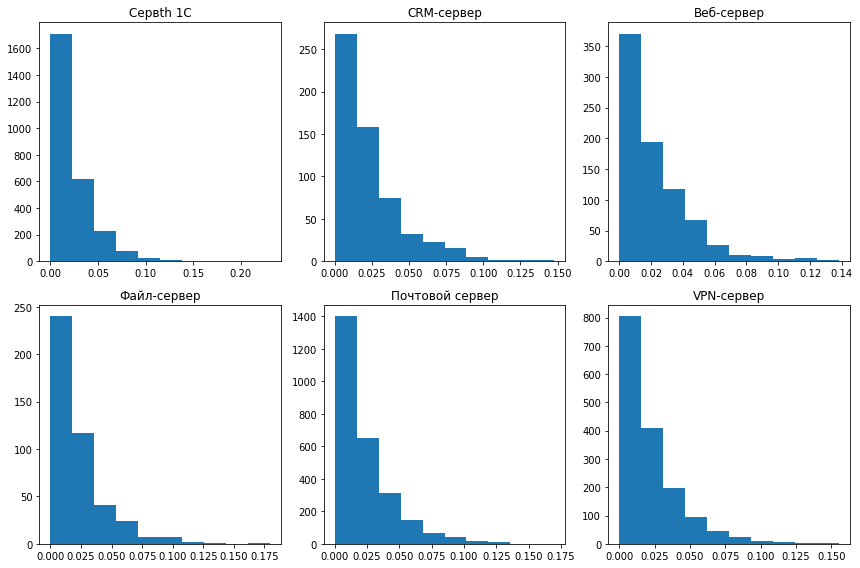

In [13]:
# Интенсивность обработки заявок на серверах
fig, axs = plt.subplots(2, 3, figsize=(12,8))
axs[0, 0].hist(node5_service_time)
axs[0, 0].set_title("Сервth 1C")

axs[1, 0].hist(node6_service_time)
axs[1, 0].set_title("Файл-сервер")

axs[0, 1].hist(node7_service_time)
axs[0, 1].set_title("CRM-сервер")

axs[1, 1].hist(node11_service_time)
axs[1, 1].set_title("Почтовой сервер")

axs[0, 2].hist(node12_service_time)
axs[0, 2].set_title("Веб-сервер")

axs[1, 2].hist(node13_service_time)
axs[1, 2].set_title("VPN-сервер")

fig.tight_layout()
plt.show()

# 3. Моделирования в течение дня
- Рабочий режим: 9-18 ч.
- Нерабочий режим: 0-9 и 18-24 ч.

## 3.1. Создание сети

In [14]:
# Создание распределение поступающих заявок по режиму работы
class DayTimeDependentDist(ciw.dists.Distribution):
  def __init__(self, lambda1=1, lambda2=1):
    self.lambda1 = lambda1
    self.lambda2 = lambda2

  def sample(self, t, ind=None):
    # time unit - hour
    hour = t % 24
    if (hour > 9) and (hour < 18):
      return random.expovariate(lambd=self.lambda1)
    return random.expovariate(lambd=self.lambda2)

In [15]:
# 500 запрос в час в рабочем режиме
# 10 запрос в час в нерабочем режиме
# 800 и 1000 запросов можно обработать в час
#lam1 = 500
#lam2 = 10
#mu1 = 800
#mu2 = 1000

lam1 = 180
lam2 = 10
mu1 = 100
mu2 = 120

N = ciw.create_network(
    arrival_distributions={'Class 0': [DayTimeDependentDist(lam1, lam2),       # Node 0
                                       DayTimeDependentDist(lam1, lam2),       # Node 1
                                       DayTimeDependentDist(lam1, lam2),       # Node 2
                                       DayTimeDependentDist(lam1, lam2),       # Node 3
                                       ciw.dists.NoArrivals(),              # Node 4
                                       ciw.dists.NoArrivals(),              # Node 5
                                       ciw.dists.NoArrivals(),              # Node 6
                                       ciw.dists.NoArrivals(),              # Node 7
                                       ciw.dists.NoArrivals(),              # Node 8
                                       ciw.dists.NoArrivals(),              # Node 9
                                       ciw.dists.NoArrivals(),              # Node 10
                                       ciw.dists.NoArrivals(),              # Node 11
                                       ciw.dists.NoArrivals(),              # Node 12
                                       ciw.dists.NoArrivals(),              # Node 13
                                       ciw.dists.NoArrivals(),              # Node 14
                                       ciw.dists.NoArrivals(),              # Node 15
                                       DayTimeDependentDist(lam1, lam2),       # Node 16
                                       ciw.dists.NoArrivals(),              # Node 17
                                       DayTimeDependentDist(lam1, lam2),       # Node 18
                                       ciw.dists.NoArrivals(),              # Node 19
                                       DayTimeDependentDist(lam1, lam2),       # Node 20
                                       ciw.dists.NoArrivals(),              # Node 21
                                       DayTimeDependentDist(lam1, lam2)],      # Node 22
                           'Class 1': [DayTimeDependentDist(lam1, lam2),       # Node 0
                                       DayTimeDependentDist(lam1, lam2),       # Node 1
                                       DayTimeDependentDist(lam1, lam2),       # Node 2
                                       DayTimeDependentDist(lam1, lam2),       # Node 3
                                       ciw.dists.NoArrivals(),              # Node 4
                                       ciw.dists.NoArrivals(),              # Node 5
                                       ciw.dists.NoArrivals(),              # Node 6
                                       ciw.dists.NoArrivals(),              # Node 7
                                       ciw.dists.NoArrivals(),              # Node 8
                                       ciw.dists.NoArrivals(),              # Node 9
                                       ciw.dists.NoArrivals(),              # Node 10
                                       ciw.dists.NoArrivals(),              # Node 11
                                       ciw.dists.NoArrivals(),              # Node 12
                                       ciw.dists.NoArrivals(),              # Node 13
                                       ciw.dists.NoArrivals(),              # Node 14
                                       ciw.dists.NoArrivals(),              # Node 15
                                       DayTimeDependentDist(lam1, lam2),       # Node 16
                                       ciw.dists.NoArrivals(),              # Node 17
                                       DayTimeDependentDist(lam1, lam2),       # Node 18
                                       ciw.dists.NoArrivals(),              # Node 19
                                       DayTimeDependentDist(lam1, lam2),       # Node 20
                                       ciw.dists.NoArrivals(),              # Node 21
                                       DayTimeDependentDist(lam1, lam2)]},     # Node 22
     service_distributions={'Class 0': [ciw.dists.Exponential(rate=mu1),       # Node 0
                                       ciw.dists.Exponential(rate=mu1),       # Node 1
                                       ciw.dists.Exponential(rate=mu1),       # Node 2
                                       ciw.dists.Exponential(rate=mu1),       # Node 3
                                       ciw.dists.Exponential(rate=mu2),     # Node 4
                                       ciw.dists.Exponential(rate=mu2),     # Node 5
                                       ciw.dists.Exponential(rate=mu2),     # Node 6
                                       ciw.dists.Exponential(rate=mu2),     # Node 7
                                       ciw.dists.Exponential(rate=mu2),     # Node 8
                                       ciw.dists.Exponential(rate=mu2),     # Node 9
                                       ciw.dists.Exponential(rate=mu2),     # Node 10
                                       ciw.dists.Exponential(rate=mu2),     # Node 11
                                       ciw.dists.Exponential(rate=mu2),     # Node 12
                                       ciw.dists.Exponential(rate=mu2),     # Node 13
                                       ciw.dists.Exponential(rate=mu2),     # Node 14
                                       ciw.dists.Exponential(rate=mu1),     # Node 15
                                       ciw.dists.Exponential(rate=mu1),     # Node 16
                                       ciw.dists.Exponential(rate=mu1),     # Node 17
                                       ciw.dists.Exponential(rate=mu1),       # Node 18
                                       ciw.dists.Exponential(rate=mu1),     # Node 19
                                       ciw.dists.Exponential(rate=mu1),       # Node 20
                                       ciw.dists.Exponential(rate=mu1),    # Node 21
                                       ciw.dists.Exponential(rate=mu2)],      # Node 22
                           'Class 1': [ciw.dists.Exponential(rate=mu1),       # Node 0
                                       ciw.dists.Exponential(rate=mu1),       # Node 1
                                       ciw.dists.Exponential(rate=mu1),       # Node 2
                                       ciw.dists.Exponential(rate=mu1),       # Node 3
                                       ciw.dists.Exponential(rate=mu2),     # Node 4
                                       ciw.dists.Exponential(rate=mu2),     # Node 5
                                       ciw.dists.Exponential(rate=mu2),     # Node 6
                                       ciw.dists.Exponential(rate=mu2),     # Node 7
                                       ciw.dists.Exponential(rate=mu2),     # Node 8
                                       ciw.dists.Exponential(rate=mu2),     # Node 9
                                       ciw.dists.Exponential(rate=mu2),     # Node 10
                                       ciw.dists.Exponential(rate=mu2),     # Node 11
                                       ciw.dists.Exponential(rate=mu2),     # Node 12
                                       ciw.dists.Exponential(rate=mu2),     # Node 13
                                       ciw.dists.Exponential(rate=mu2),     # Node 14
                                       ciw.dists.Exponential(rate=mu1),     # Node 15
                                       ciw.dists.Exponential(rate=mu1),     # Node 16
                                       ciw.dists.Exponential(rate=mu1),     # Node 17
                                       ciw.dists.Exponential(rate=mu1),       # Node 18
                                       ciw.dists.Exponential(rate=mu1),     # Node 19
                                       ciw.dists.Exponential(rate=mu1),       # Node 20
                                       ciw.dists.Exponential(rate=mu1),    # Node 21
                                       ciw.dists.Exponential(rate=mu2)]},      # Node 22
    routing={'Class 0': class0_routing.tolist(),
             'Class 1': class1_routing.tolist()},
    number_of_servers=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    queue_capacities=[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
)

## 3.2 Запуск моделирования

In [16]:
node5_utilisation = []
node6_utilisation = []
node7_utilisation = []
node11_utilisation = []
node12_utilisation = []
node13_utilisation = []

node5_service_time = []
node6_service_time = []
node7_service_time = []
node11_service_time = []
node12_service_time = []
node13_service_time = []

node5_reject = []
node6_reject = []
node7_reject = []
node11_reject = []
node12_reject = []
node13_reject = []

day_reject = 0

for trial in range(1):
  ciw.seed(trial)
  Q = ciw.Simulation(N)
  Q.simulate_until_max_time(24, progress_bar=False) # 24 часа
  recs = Q.get_all_records()
  # Получить время обслуживания серверов
  node5_service_time.extend([r.service_time for r in recs if r.node==5])
  node6_service_time.extend([r.service_time for r in recs if r.node==6])
  node7_service_time.extend([r.service_time for r in recs if r.node==7])
  node11_service_time.extend([r.service_time for r in recs if r.node==11])
  node12_service_time.extend([r.service_time for r in recs if r.node==12])
  node13_service_time.extend([r.service_time for r in recs if r.node==13])

  # Получить среднюю заргуженность сервера
  node5_utilisation.append(Q.transitive_nodes[5].server_utilisation)
  node6_utilisation.append(Q.transitive_nodes[6].server_utilisation)
  node7_utilisation.append(Q.transitive_nodes[7].server_utilisation)
  node11_utilisation.append(Q.transitive_nodes[11].server_utilisation)
  node12_utilisation.append(Q.transitive_nodes[12].server_utilisation)
  node13_utilisation.append(Q.transitive_nodes[13].server_utilisation)

  # Получичт количество отказов от серверов
  node5_reject.append(len(Q.rejection_dict[6][0]))
  node6_reject.append(len(Q.rejection_dict[7][0]))
  node7_reject.append(len(Q.rejection_dict[8][0]))
  node11_reject.append(len(Q.rejection_dict[12][0]))
  node12_reject.append(len(Q.rejection_dict[13][0]))
  node13_reject.append(len(Q.rejection_dict[14][0]))

  for i in range(1, 24):
    day_reject += len(Q.rejection_dict[i][0])

## 3.3 Результаты моделирования

In [17]:
# Загруженность серверов
node5_day_load = mean(node5_utilisation)
node6_day_load = mean(node6_utilisation)
node7_day_load = mean(node7_utilisation)
node11_day_load = mean(node11_utilisation)
node12_day_load = mean(node12_utilisation)
node13_day_load = mean(node13_utilisation)

print("Средняя загруженность сервера 1C = ", mean(node5_utilisation))
print("Средняя загруженность файл-сервера = ", mean(node6_utilisation))
print("Средняя загруженность CRM-сервера = ", mean(node7_utilisation))
print("Средняя загруженность почтового сервера = ", mean(node11_utilisation))
print("Средняя загруженность веб-сервера = ", mean(node12_utilisation))
print("Средняя загруженность VPN-сервера = ", mean(node13_utilisation))

Средняя загруженность сервера 1C =  0.15469251591312738
Средняя загруженность файл-сервера =  0.2091184005776795
Средняя загруженность CRM-сервера =  0.2292706855175799
Средняя загруженность почтового сервера =  0.29891222886725943
Средняя загруженность веб-сервера =  0.6144222403638859
Средняя загруженность VPN-сервера =  0.090281745970732


In [18]:
# Количество заявок поступающих к серверм
print("Среднее количество заявок, поступающих к серверу 1C = ", len(node5_service_time))
print("Среднее количество заявок, поступающих к файл-серверау = ", len(node6_service_time))
print("Среднее количество заявок, поступающих к CRM-серверу = ", len(node7_service_time))
print("Среднее количество заявок, поступающих к почтовому серверу = ", len(node11_service_time))
print("Среднее количество заявок, поступающих к веб-серверу = ", len(node12_service_time))
print("Среднее количество заявок, поступающих к VPN-серверу = ", len(node13_service_time))

Среднее количество заявок, поступающих к серверу 1C =  2594
Среднее количество заявок, поступающих к файл-серверау =  444
Среднее количество заявок, поступающих к CRM-серверу =  605
Среднее количество заявок, поступающих к почтовому серверу =  2448
Среднее количество заявок, поступающих к веб-серверу =  807
Среднее количество заявок, поступающих к VPN-серверу =  1680


In [19]:
# Количество отзазов
print("Среднее количество отказов завяки в течения дня = ", day_reject)

Среднее количество отказов завяки в течения дня =  1351


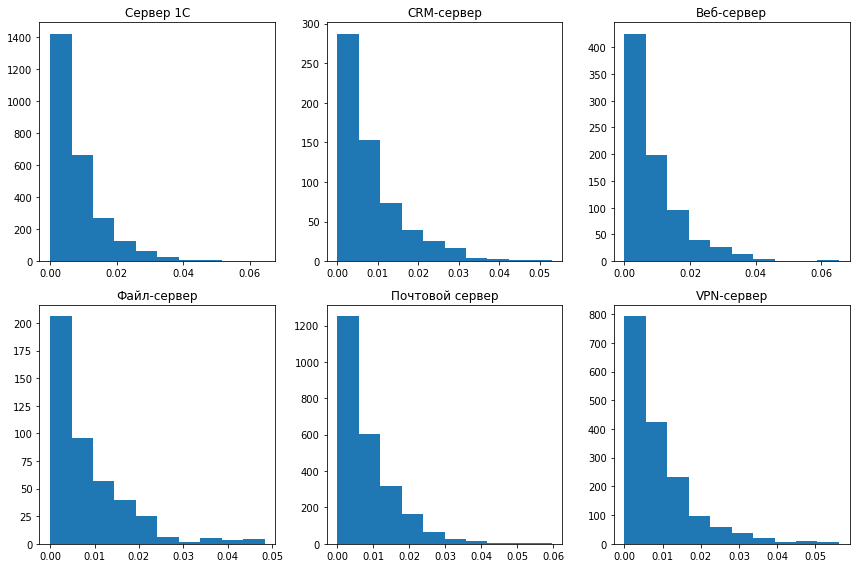

In [20]:
# Интенсивность обработки заявок на серверах
fig, axs = plt.subplots(2, 3, figsize=(12,8))
axs[0, 0].hist(node5_service_time)
axs[0, 0].set_title("Сервер 1C")

axs[1, 0].hist(node6_service_time)
axs[1, 0].set_title("Файл-сервер")

axs[0, 1].hist(node7_service_time)
axs[0, 1].set_title("CRM-сервер")

axs[1, 1].hist(node11_service_time)
axs[1, 1].set_title("Почтовой сервер")

axs[0, 2].hist(node12_service_time)
axs[0, 2].set_title("Веб-сервер")

axs[1, 2].hist(node13_service_time)
axs[1, 2].set_title("VPN-сервер")

fig.tight_layout()
plt.show()

# 4. Моделирование в течение месяца

## 4.1 Создание сети

In [21]:
class MonthTimeDependentDist(ciw.dists.Distribution):
  def __init__(self, lambda1=1, lambda2=1):
    self.lambda1 = lambda1
    self.lambda2 = lambda2
  
  def sample(self, t, ind=None):
    # time unit - hour
    hour = t % 24
    day = (t/24) % 7

    if (hour > 9) and (hour < 18) and (day > 0) and (day < 5):
      return random.expovariate(lambd=self.lambda1)
    return random.expovariate(lambd=self.lambda2)

  '''
  def sample(self, t, ind=None):
    # time unit - minute
    hour = (t/60) % 24
    day = (t/60/24) % (7)

    if (hour > 9) and (hour < 18) and (day > 0) and (day < 5):
      return random.expovariate(lambd=self.lambda1)
    return random.expovariate(lambd=self.lambda2)
    '''

In [22]:
#lam1 = 500
#lam2 = 10
#mu1 = 800
#mu2 = 1000

lam1 = 80
lam2 = 10
mu1 = 100
mu2 = 120

N = ciw.create_network(
    arrival_distributions={'Class 0': [MonthTimeDependentDist(lam1, lam2),       # Node 0
                                       MonthTimeDependentDist(lam1, lam2),       # Node 1
                                       MonthTimeDependentDist(lam1, lam2),       # Node 2
                                       MonthTimeDependentDist(lam1, lam2),       # Node 3
                                       ciw.dists.NoArrivals(),              # Node 4
                                       ciw.dists.NoArrivals(),              # Node 5
                                       ciw.dists.NoArrivals(),              # Node 6
                                       ciw.dists.NoArrivals(),              # Node 7
                                       ciw.dists.NoArrivals(),              # Node 8
                                       ciw.dists.NoArrivals(),              # Node 9
                                       ciw.dists.NoArrivals(),              # Node 10
                                       ciw.dists.NoArrivals(),              # Node 11
                                       ciw.dists.NoArrivals(),              # Node 12
                                       ciw.dists.NoArrivals(),              # Node 13
                                       ciw.dists.NoArrivals(),              # Node 14
                                       ciw.dists.NoArrivals(),              # Node 15
                                       MonthTimeDependentDist(lam1, lam2),       # Node 16
                                       ciw.dists.NoArrivals(),              # Node 17
                                       MonthTimeDependentDist(lam1, lam2),       # Node 18
                                       ciw.dists.NoArrivals(),              # Node 19
                                       MonthTimeDependentDist(lam1, lam2),       # Node 20
                                       ciw.dists.NoArrivals(),              # Node 21
                                       MonthTimeDependentDist(lam1, lam2)],      # Node 22
                           'Class 1': [MonthTimeDependentDist(lam1, lam2),       # Node 0
                                       MonthTimeDependentDist(lam1, lam2),       # Node 1
                                       MonthTimeDependentDist(lam1, lam2),       # Node 2
                                       MonthTimeDependentDist(lam1, lam2),       # Node 3
                                       ciw.dists.NoArrivals(),              # Node 4
                                       ciw.dists.NoArrivals(),              # Node 5
                                       ciw.dists.NoArrivals(),              # Node 6
                                       ciw.dists.NoArrivals(),              # Node 7
                                       ciw.dists.NoArrivals(),              # Node 8
                                       ciw.dists.NoArrivals(),              # Node 9
                                       ciw.dists.NoArrivals(),              # Node 10
                                       ciw.dists.NoArrivals(),              # Node 11
                                       ciw.dists.NoArrivals(),              # Node 12
                                       ciw.dists.NoArrivals(),              # Node 13
                                       ciw.dists.NoArrivals(),              # Node 14
                                       ciw.dists.NoArrivals(),              # Node 15
                                       MonthTimeDependentDist(lam1, lam2),       # Node 16
                                       ciw.dists.NoArrivals(),              # Node 17
                                       MonthTimeDependentDist(lam1, lam2),       # Node 18
                                       ciw.dists.NoArrivals(),              # Node 19
                                       MonthTimeDependentDist(lam1, lam2),       # Node 20
                                       ciw.dists.NoArrivals(),              # Node 21
                                       MonthTimeDependentDist(lam1, lam2)]},     # Node 22
    service_distributions={'Class 0': [ciw.dists.Exponential(rate=mu1),       # Node 0
                                       ciw.dists.Exponential(rate=mu1),       # Node 1
                                       ciw.dists.Exponential(rate=mu1),       # Node 2
                                       ciw.dists.Exponential(rate=mu1),       # Node 3
                                       ciw.dists.Exponential(rate=mu2),     # Node 4
                                       ciw.dists.Exponential(rate=mu2),     # Node 5
                                       ciw.dists.Exponential(rate=mu2),     # Node 6
                                       ciw.dists.Exponential(rate=mu2),     # Node 7
                                       ciw.dists.Exponential(rate=mu2),     # Node 8
                                       ciw.dists.Exponential(rate=mu2),     # Node 9
                                       ciw.dists.Exponential(rate=mu2),     # Node 10
                                       ciw.dists.Exponential(rate=mu2),     # Node 11
                                       ciw.dists.Exponential(rate=mu2),     # Node 12
                                       ciw.dists.Exponential(rate=mu2),     # Node 13
                                       ciw.dists.Exponential(rate=mu2),     # Node 14
                                       ciw.dists.Exponential(rate=mu1),     # Node 15
                                       ciw.dists.Exponential(rate=mu1),     # Node 16
                                       ciw.dists.Exponential(rate=mu1),     # Node 17
                                       ciw.dists.Exponential(rate=mu1),       # Node 18
                                       ciw.dists.Exponential(rate=mu1),     # Node 19
                                       ciw.dists.Exponential(rate=mu1),       # Node 20
                                       ciw.dists.Exponential(rate=mu1),    # Node 21
                                       ciw.dists.Exponential(rate=mu2)],      # Node 22
                           'Class 1': [ciw.dists.Exponential(rate=mu1),       # Node 0
                                       ciw.dists.Exponential(rate=mu1),       # Node 1
                                       ciw.dists.Exponential(rate=mu1),       # Node 2
                                       ciw.dists.Exponential(rate=mu1),       # Node 3
                                       ciw.dists.Exponential(rate=mu2),     # Node 4
                                       ciw.dists.Exponential(rate=mu2),     # Node 5
                                       ciw.dists.Exponential(rate=mu2),     # Node 6
                                       ciw.dists.Exponential(rate=mu2),     # Node 7
                                       ciw.dists.Exponential(rate=mu2),     # Node 8
                                       ciw.dists.Exponential(rate=mu2),     # Node 9
                                       ciw.dists.Exponential(rate=mu2),     # Node 10
                                       ciw.dists.Exponential(rate=mu2),     # Node 11
                                       ciw.dists.Exponential(rate=mu2),     # Node 12
                                       ciw.dists.Exponential(rate=mu2),     # Node 13
                                       ciw.dists.Exponential(rate=mu2),     # Node 14
                                       ciw.dists.Exponential(rate=mu1),     # Node 15
                                       ciw.dists.Exponential(rate=mu1),     # Node 16
                                       ciw.dists.Exponential(rate=mu1),     # Node 17
                                       ciw.dists.Exponential(rate=mu1),       # Node 18
                                       ciw.dists.Exponential(rate=mu1),     # Node 19
                                       ciw.dists.Exponential(rate=mu1),       # Node 20
                                       ciw.dists.Exponential(rate=mu1),    # Node 21
                                       ciw.dists.Exponential(rate=mu2)]},      # Node 22
    routing={'Class 0': class0_routing.tolist(),
             'Class 1': class1_routing.tolist()},
    number_of_servers=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    queue_capacities=[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
)

## 4.2 Запуск моделирования

In [23]:
node5_utilisation = []
node6_utilisation = []
node7_utilisation = []
node11_utilisation = []
node12_utilisation = []
node13_utilisation = []

node5_service_time = []
node6_service_time = []
node7_service_time = []
node11_service_time = []
node12_service_time = []
node13_service_time = []

node5_reject = []
node6_reject = []
node7_reject = []
node11_reject = []
node12_reject = []
node13_reject = []

month_reject = 0

for trial in range(1):
  ciw.seed(trial)
  Q = ciw.Simulation(N)
  Q.simulate_until_max_time(24*30, progress_bar=False) # 24 hour * 30 days
  recs = Q.get_all_records()
  # Получить время обслуживания серверов
  node5_service_time.extend([r.service_time for r in recs if r.node==5])
  node6_service_time.extend([r.service_time for r in recs if r.node==6])
  node7_service_time.extend([r.service_time for r in recs if r.node==7])
  node11_service_time.extend([r.service_time for r in recs if r.node==11])
  node12_service_time.extend([r.service_time for r in recs if r.node==12])
  node13_service_time.extend([r.service_time for r in recs if r.node==13])

  # Получить среднюю заргуженность сервера
  node5_utilisation.append(Q.transitive_nodes[5].server_utilisation)
  node6_utilisation.append(Q.transitive_nodes[6].server_utilisation)
  node7_utilisation.append(Q.transitive_nodes[7].server_utilisation)
  node11_utilisation.append(Q.transitive_nodes[11].server_utilisation)
  node12_utilisation.append(Q.transitive_nodes[12].server_utilisation)
  node13_utilisation.append(Q.transitive_nodes[13].server_utilisation)

  # Получичт количество отказов от серверов
  node5_reject.append(len(Q.rejection_dict[6][0]))
  node6_reject.append(len(Q.rejection_dict[7][0]))
  node7_reject.append(len(Q.rejection_dict[8][0]))
  node11_reject.append(len(Q.rejection_dict[12][0]))
  node12_reject.append(len(Q.rejection_dict[13][0]))
  node13_reject.append(len(Q.rejection_dict[14][0]))

  for i in range(1, 24):
    month_reject += len(Q.rejection_dict[i][0])

## 4.3 Результаты моделирования

In [24]:
# Загруженность серверов
node5_month_load = mean(node5_utilisation)
node6_month_load = mean(node6_utilisation)
node7_month_load = mean(node7_utilisation)
node11_month_load = mean(node11_utilisation)
node12_month_load = mean(node12_utilisation)
node13_month_load = mean(node13_utilisation)

print("Средняя загруженность сервера 1C = ", mean(node5_utilisation))
print("Средняя загруженность файл-сервера = ", mean(node6_utilisation))
print("Средняя загруженность CRM-сервера = ", mean(node7_utilisation))
print("Средняя загруженность почтового сервера = ", mean(node11_utilisation))
print("Средняя загруженность веб-сервера = ", mean(node12_utilisation))
print("Средняя загруженность VPN-сервера = ", mean(node13_utilisation))

Средняя загруженность сервера 1C =  0.1713799965095742
Средняя загруженность файл-сервера =  0.22228276943799027
Средняя загруженность CRM-сервера =  0.270879896711889
Средняя загруженность почтового сервера =  0.30221090631184794
Средняя загруженность веб-сервера =  0.5982520548760396
Средняя загруженность VPN-сервера =  0.09725033480056074


In [25]:
# Количество заявок поступающих к серверм
print("Среднее количество заявок, поступающих к серверу 1C = ", len(node5_service_time)/1)
print("Среднее количество заявок, поступающих к файл-серверау = ", len(node6_service_time)/1)
print("Среднее количество заявок, поступающих к CRM-серверу = ", len(node7_service_time)/1)
print("Среднее количество заявок, поступающих к почтовому серверу = ", len(node11_service_time)/1)
print("Среднее количество заявок, поступающих к веб-серверу = ", len(node12_service_time)/1)
print("Среднее количество заявок, поступающих к VPN-серверу = ", len(node13_service_time)/1)

Среднее количество заявок, поступающих к серверу 1C =  86140.0
Среднее количество заявок, поступающих к файл-серверау =  14978.0
Среднее количество заявок, поступающих к CRM-серверу =  19297.0
Среднее количество заявок, поступающих к почтовому серверу =  59857.0
Среднее количество заявок, поступающих к веб-серверу =  26035.0
Среднее количество заявок, поступающих к VPN-серверу =  51638.0


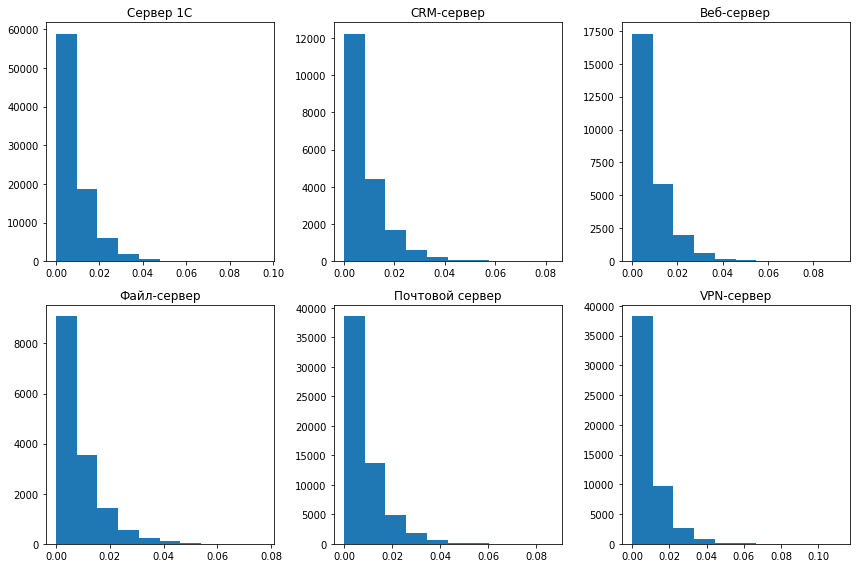

In [26]:
# Интенсивность обработки заявок на серверах
fig, axs = plt.subplots(2, 3, figsize=(12,8))
axs[0, 0].hist(node5_service_time)
axs[0, 0].set_title("Сервер 1C")

axs[1, 0].hist(node6_service_time)
axs[1, 0].set_title("Файл-сервер")

axs[0, 1].hist(node7_service_time)
axs[0, 1].set_title("CRM-сервер")

axs[1, 1].hist(node11_service_time)
axs[1, 1].set_title("Почтовой сервер")

axs[0, 2].hist(node12_service_time)
axs[0, 2].set_title("Веб-сервер")

axs[1, 2].hist(node13_service_time)
axs[1, 2].set_title("VPN-сервер")

fig.tight_layout()
plt.show()

In [27]:
# Количество отзазов
print("Среднее количество отказов завяки в течения месяца = ", month_reject)

Среднее количество отказов завяки в течения месяца =  80432


# 5. Моделирование в течение года

## 5.1 Создание сети

In [28]:
class YearTimeDependentDist(ciw.dists.Distribution):
  def __init__(self, lambda1=1, lambda2=1):
    self.lambda1 = lambda1
    self.lambda2 = lambda2
  def sample(self, t, ind=None):
    # time unit = hours
    hour = t % 24
    day = (t / 24) % 7
    month = t / (24*30)
    if (hour > 9) and (hour < 18) and (day > 0) and (day < 5) and (month >= 1) and (month < 12):
      return random.expovariate(lambd=self.lambda1)
    return random.expovariate(lambd=self.lambda2)
    
    '''
  def sample(self, t, ind=None):
    # time unit = minutes
    hour = (t/60) % 24
    day = (t / 60 / 24) % 7
    month = (t/60) / 24
    if (hour > 9) and (hour < 18) and (day > 0) and (day < 5) and (month >= 1) and (month < 12):
      return random.expovariate(lambd=self.lambda1)
    return random.expovariate(lambd=self.lambda2)
    '''

In [29]:
lam1 = 80
lam2 = 10
mu1 = 100
mu2 = 120

N = ciw.create_network(
    arrival_distributions={'Class 0': [YearTimeDependentDist(lam1, lam2),       # Node 0
                                       YearTimeDependentDist(lam1, lam2),       # Node 1
                                       YearTimeDependentDist(lam1, lam2),       # Node 2
                                       YearTimeDependentDist(lam1, lam2),       # Node 3
                                       ciw.dists.NoArrivals(),              # Node 4
                                       ciw.dists.NoArrivals(),              # Node 5
                                       ciw.dists.NoArrivals(),              # Node 6
                                       ciw.dists.NoArrivals(),              # Node 7
                                       ciw.dists.NoArrivals(),              # Node 8
                                       ciw.dists.NoArrivals(),              # Node 9
                                       ciw.dists.NoArrivals(),              # Node 10
                                       ciw.dists.NoArrivals(),              # Node 11
                                       ciw.dists.NoArrivals(),              # Node 12
                                       ciw.dists.NoArrivals(),              # Node 13
                                       ciw.dists.NoArrivals(),              # Node 14
                                       ciw.dists.NoArrivals(),              # Node 15
                                       YearTimeDependentDist(lam1, lam2),       # Node 16
                                       ciw.dists.NoArrivals(),              # Node 17
                                       YearTimeDependentDist(lam1, lam2),       # Node 18
                                       ciw.dists.NoArrivals(),              # Node 19
                                       YearTimeDependentDist(lam1, lam2),       # Node 20
                                       ciw.dists.NoArrivals(),              # Node 21
                                       YearTimeDependentDist(lam1, lam2)],      # Node 22
                           'Class 1': [YearTimeDependentDist(lam1, lam2),       # Node 0
                                       YearTimeDependentDist(lam1, lam2),       # Node 1
                                       YearTimeDependentDist(lam1, lam2),       # Node 2
                                       YearTimeDependentDist(lam1, lam2),       # Node 3
                                       ciw.dists.NoArrivals(),              # Node 4
                                       ciw.dists.NoArrivals(),              # Node 5
                                       ciw.dists.NoArrivals(),              # Node 6
                                       ciw.dists.NoArrivals(),              # Node 7
                                       ciw.dists.NoArrivals(),              # Node 8
                                       ciw.dists.NoArrivals(),              # Node 9
                                       ciw.dists.NoArrivals(),              # Node 10
                                       ciw.dists.NoArrivals(),              # Node 11
                                       ciw.dists.NoArrivals(),              # Node 12
                                       ciw.dists.NoArrivals(),              # Node 13
                                       ciw.dists.NoArrivals(),              # Node 14
                                       ciw.dists.NoArrivals(),              # Node 15
                                       YearTimeDependentDist(lam1, lam2),       # Node 16
                                       ciw.dists.NoArrivals(),              # Node 17
                                       YearTimeDependentDist(lam1, lam2),       # Node 18
                                       ciw.dists.NoArrivals(),              # Node 19
                                       YearTimeDependentDist(lam1, lam2),       # Node 20
                                       ciw.dists.NoArrivals(),              # Node 21
                                       YearTimeDependentDist(lam1, lam2)]},     # Node 22
    service_distributions={'Class 0': [ciw.dists.Exponential(rate=mu1),       # Node 0
                                       ciw.dists.Exponential(rate=mu1),       # Node 1
                                       ciw.dists.Exponential(rate=mu1),       # Node 2
                                       ciw.dists.Exponential(rate=mu1),       # Node 3
                                       ciw.dists.Exponential(rate=mu2),     # Node 4
                                       ciw.dists.Exponential(rate=mu2),     # Node 5
                                       ciw.dists.Exponential(rate=mu2),     # Node 6
                                       ciw.dists.Exponential(rate=mu2),     # Node 7
                                       ciw.dists.Exponential(rate=mu2),     # Node 8
                                       ciw.dists.Exponential(rate=mu2),     # Node 9
                                       ciw.dists.Exponential(rate=mu2),     # Node 10
                                       ciw.dists.Exponential(rate=mu2),     # Node 11
                                       ciw.dists.Exponential(rate=mu2),     # Node 12
                                       ciw.dists.Exponential(rate=mu2),     # Node 13
                                       ciw.dists.Exponential(rate=mu2),     # Node 14
                                       ciw.dists.Exponential(rate=mu1),     # Node 15
                                       ciw.dists.Exponential(rate=mu1),     # Node 16
                                       ciw.dists.Exponential(rate=mu1),     # Node 17
                                       ciw.dists.Exponential(rate=mu1),       # Node 18
                                       ciw.dists.Exponential(rate=mu1),     # Node 19
                                       ciw.dists.Exponential(rate=mu1),       # Node 20
                                       ciw.dists.Exponential(rate=mu1),    # Node 21
                                       ciw.dists.Exponential(rate=mu2)],      # Node 22
                           'Class 1': [ciw.dists.Exponential(rate=mu1),       # Node 0
                                       ciw.dists.Exponential(rate=mu1),       # Node 1
                                       ciw.dists.Exponential(rate=mu1),       # Node 2
                                       ciw.dists.Exponential(rate=mu1),       # Node 3
                                       ciw.dists.Exponential(rate=mu2),     # Node 4
                                       ciw.dists.Exponential(rate=mu2),     # Node 5
                                       ciw.dists.Exponential(rate=mu2),     # Node 6
                                       ciw.dists.Exponential(rate=mu2),     # Node 7
                                       ciw.dists.Exponential(rate=mu2),     # Node 8
                                       ciw.dists.Exponential(rate=mu2),     # Node 9
                                       ciw.dists.Exponential(rate=mu2),     # Node 10
                                       ciw.dists.Exponential(rate=mu2),     # Node 11
                                       ciw.dists.Exponential(rate=mu2),     # Node 12
                                       ciw.dists.Exponential(rate=mu2),     # Node 13
                                       ciw.dists.Exponential(rate=mu2),     # Node 14
                                       ciw.dists.Exponential(rate=mu1),     # Node 15
                                       ciw.dists.Exponential(rate=mu1),     # Node 16
                                       ciw.dists.Exponential(rate=mu1),     # Node 17
                                       ciw.dists.Exponential(rate=mu1),       # Node 18
                                       ciw.dists.Exponential(rate=mu1),     # Node 19
                                       ciw.dists.Exponential(rate=mu1),       # Node 20
                                       ciw.dists.Exponential(rate=mu1),    # Node 21
                                       ciw.dists.Exponential(rate=mu2)]},      # Node 22
    routing={'Class 0': class0_routing.tolist(),
             'Class 1': class1_routing.tolist()},
    number_of_servers=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    queue_capacities=[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
)

## 5.2 Запуск моделирования

In [ ]:
node5_utilisation = []
node6_utilisation = []
node7_utilisation = []
node11_utilisation = []
node12_utilisation = []
node13_utilisation = []

node5_service_time = []
node6_service_time = []
node7_service_time = []
node11_service_time = []
node12_service_time = []
node13_service_time = []

node5_reject = []
node6_reject = []
node7_reject = []
node11_reject = []
node12_reject = []
node13_reject = []

year_reject = 0
for trial in range(1):
  ciw.seed(trial)
  Q = ciw.Simulation(N)
  Q.simulate_until_max_time(24*30*12, progress_bar=False) # 60 min * 24 hour * 30 days * 12 months
  recs = Q.get_all_records()
  # Получить время обслуживания серверов
  node5_service_time.extend([r.service_time for r in recs if r.node==5])
  node6_service_time.extend([r.service_time for r in recs if r.node==6])
  node7_service_time.extend([r.service_time for r in recs if r.node==7])
  node11_service_time.extend([r.service_time for r in recs if r.node==11])
  node12_service_time.extend([r.service_time for r in recs if r.node==12])
  node13_service_time.extend([r.service_time for r in recs if r.node==13])

  # Получить среднюю заргуженность сервера
  node5_utilisation.append(Q.transitive_nodes[5].server_utilisation)
  node6_utilisation.append(Q.transitive_nodes[6].server_utilisation)
  node7_utilisation.append(Q.transitive_nodes[7].server_utilisation)
  node11_utilisation.append(Q.transitive_nodes[11].server_utilisation)
  node12_utilisation.append(Q.transitive_nodes[12].server_utilisation)
  node13_utilisation.append(Q.transitive_nodes[13].server_utilisation)

  # Получичт количество отказов от серверов
  node5_reject.append(len(Q.rejection_dict[6][0]))
  node6_reject.append(len(Q.rejection_dict[7][0]))
  node7_reject.append(len(Q.rejection_dict[8][0]))
  node11_reject.append(len(Q.rejection_dict[12][0]))
  node12_reject.append(len(Q.rejection_dict[13][0]))
  node13_reject.append(len(Q.rejection_dict[14][0]))

  for i in range(1, 24):
    year_reject += len(Q.rejection_dict[i][0])

## 5.3 Результаты моделирования

In [ ]:
# Загруженность серверов
node5_year_load = mean(node5_utilisation)
node6_year_load = mean(node6_utilisation)
node7_year_load = mean(node7_utilisation)
node11_year_load = mean(node11_utilisation)
node12_year_load = mean(node12_utilisation)
node13_year_load = mean(node13_utilisation)

print("Средняя загруженность сервера 1C = ", mean(node5_utilisation))
print("Средняя загруженность файл-сервера = ", mean(node6_utilisation))
print("Средняя загруженность CRM-сервера = ", mean(node7_utilisation))
print("Средняя загруженность почтового сервера = ", mean(node11_utilisation))
print("Средняя загруженность веб-сервера = ", mean(node12_utilisation))
print("Средняя загруженность VPN-сервера = ", mean(node13_utilisation))

In [ ]:
# Количество заявок поступающих к серверм
print("Среднее количество заявок поступающих, к серверу 1C = ", len(node5_service_time)/1)
print("Среднее количество заявок поступающих, к файл-серверау = ", len(node6_service_time)/1)
print("Среднее количество заявок поступающих, к CRM-серверу = ", len(node7_service_time)/1)
print("Среднее количество заявок поступающих, к почтовому серверу = ", len(node11_service_time)/1)
print("Среднее количество заявок поступающих, к веб-серверу = ", len(node12_service_time)/1)
print("Среднее количество заявок поступающих, к VPN-серверу = ", len(node13_service_time)/1)

In [ ]:
# Интенсивность обработки заявок на серверах
fig, axs = plt.subplots(2, 3, figsize=(12,8))
axs[0, 0].hist(node5_service_time)
axs[0, 0].set_title("Сервер 1C")

axs[1, 0].hist(node6_service_time)
axs[1, 0].set_title("Файл-сервер")

axs[0, 1].hist(node7_service_time)
axs[0, 1].set_title("CRM-сервер")

axs[1, 1].hist(node11_service_time)
axs[1, 1].set_title("Почтовой сервер")

axs[0, 2].hist(node12_service_time)
axs[0, 2].set_title("Веб-сервер")

axs[1, 2].hist(node13_service_time)
axs[1, 2].set_title("VPN-сервер")

fig.tight_layout()
plt.show()

In [ ]:
# Количество отзазов
print("Среднее Количество отказов завяки в течения года = ", year_reject)

# Общий граф

In [ ]:
year_reject /= 10 
timeLine = ['Час', 'День', 'Месяц', 'Год']

reject = [hour_reject, 1351, month_reject, 100753]
plt.bar(timeLine, reject)
plt.xticks(timeLine)
plt.xlabel('Время')
plt.ylabel('Среднее количество отказов')
plt.show()

In [ ]:
node5_load = [node5_hour_load, node5_day_load, node5_month_load, node5_year_load]
node6_load = [node6_hour_load, node6_day_load, node6_month_load, node6_year_load]
node7_load = [node7_hour_load, node7_day_load, node7_month_load, node7_year_load]
node11_load = [node11_hour_load, node11_day_load, node11_month_load, node11_year_load]
node12_load = [node12_hour_load, node12_day_load, node12_month_load, node12_year_load]
node13_load = [node13_hour_load, node13_day_load, node13_month_load, node13_year_load]

fig, axs = plt.subplots(2, 3, figsize=(12,8))
fig.suptitle('Загруженность серверов')

axs[0, 0].bar(timeLine, node5_load)
axs[0, 0].set_title("Сервер 1C")

axs[1, 0].bar(timeLine, node6_load)
axs[1, 0].set_title("Файл-сервер")

axs[0, 1].bar(timeLine, node7_load)
axs[0, 1].set_title("CRM-Сервер")

axs[1, 1].bar(timeLine, node11_load)
axs[1, 1].set_title("Почтовой cервер")

axs[0, 2].bar(timeLine, node12_load)
axs[0, 2].set_title("Веб-сервер")

axs[1, 2].bar(timeLine, node13_load)
axs[1, 2].set_title("VPN-сервер")

plt.show()